In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer # Because we want to turn categorical variables to binary
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [106]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

--2024-10-29 16:53:20--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-10-29 16:53:20--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv.1’

jamb_exam_results.c 100%[===================>] 382.33K  --.-KB/s    in 0.05s   

2024-10-29 16:53:20 (6.88 MB/s) - ‘jamb_exam_resu

In [107]:
df = pd.read_csv('jamb_exam_results.csv')

In [108]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


### **Prep the data**

In [109]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [110]:
# Remove the student_id column
del df['student_id']

In [111]:
# Fill in missing values with zeros
df.isnull().sum()

,0
jamb_score,0
study_hours_per_week,0
attendance_rate,0
teacher_quality,0
distance_to_school,0
school_type,0
school_location,0
extra_tutorials,0
access_to_learning_materials,0
parent_involvement,0


In [112]:
df=df.fillna(0)

In [113]:
#Do train/validation/test split with 60%/20%/20% distribution.
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [114]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [115]:
y_train = df_train.jamb_score.values
y_test = df_test.jamb_score.values
y_val = df_val.jamb_score.values

In [116]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [117]:
# One Hot Encoding
dv= DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

### **Question 1**
Let's train a decision tree regressor to predict the jamb_score variable.

Train a model with max_depth=1.

Which feature is used for splitting the data?

- study_hours_per_week

- attendance_rate

- teacher_quality

- distance_to_school

In [118]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [119]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- study_hours_per_week <= 18.50
|   |--- class: 118
|--- study_hours_per_week >  18.50
|   |--- class: 190



### **Train a random forest model with these parameters:**

n_estimators=10

random_state=1

n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

22.13

42.13

62.13

82.12

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [141]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs = -1)

In [142]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [143]:
y_pred = rf.predict(X_val)

In [144]:
rmse = mean_squared_error(y_val, y_pred, squared=False)
rmse2 = root_mean_squared_error(y_val, y_pred)
print( rmse)
print(rmse2)

42.13724207871227
42.13724207871227


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### **Question 3**
Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.

Set random_state to 1.

Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

10

25

80

200

In [145]:
scores = []

for n in range(10, 201,10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred).round(3)

    scores.append((n, rmse))

In [146]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

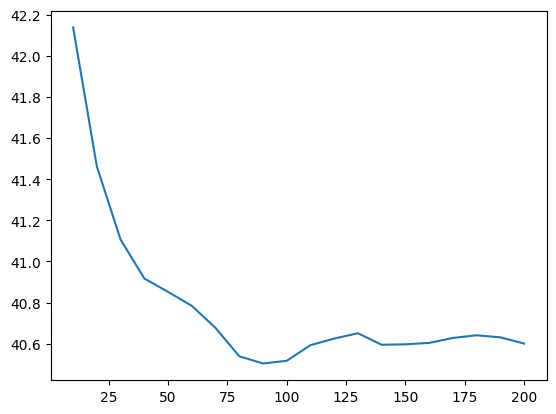

In [147]:
plt.plot(df_scores.n_estimators, df_scores.rmse)


In [148]:
df_scores

,n_estimators,rmse
0,10,42.137
1,20,41.461
2,30,41.106
3,40,40.917
4,50,40.852
5,60,40.784
6,70,40.677
7,80,40.539
8,90,40.504
9,100,40.517


### **Question 4**
Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]

For each of these values,

  try different values of n_estimators from 10 till 200 (with step 10)

  calculate the mean RMSE

Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

10

15

20

25

In [150]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201,10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth = d,
                                    random_state=1, n_jobs = -1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred).round(3)

        scores.append((d,n, rmse))

In [151]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

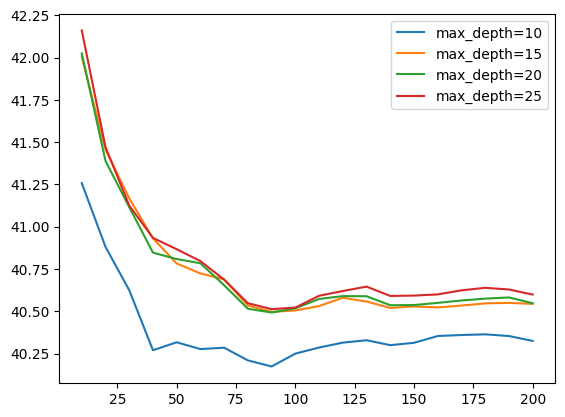

In [152]:
for d in [10, 15,20,25]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

### **Question 5**

We can extract feature importance information from tree-based models.


At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.


In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.


For this homework question, we'll find the most important feature:


Train the model with these parameters:

n_estimators=10,

max_depth=20,

random_state=1,

n_jobs=-1 (optional)

Get the feature importance information from this model

What's the most important feature (among these 4)?

study_hours_per_week

attendance_rate

distance_to_school

teacher_quality


In [153]:
rf = RandomForestRegressor(n_estimators=10,
                                    max_depth = 20,
                                    random_state=1,
                                    n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [154]:
columns = ['features', 'importance']
df_fi = pd.DataFrame({
    'features': dv.get_feature_names_out(),
    'importance': rf.feature_importances_
})

In [155]:
df_fi.sort_values(by='importance', ascending=False)

,features,importance
27,study_hours_per_week,0.248354
4,attendance_rate,0.149729
5,distance_to_school,0.136486
28,teacher_quality,0.082682
2,age,0.069311
3,assignments_completed,0.031517
24,socioeconomic_status=High,0.025714
17,parent_involvement=High,0.022919
10,it_knowledge=High,0.017719
15,parent_education_level=Secondary,0.016957


### **Question 6**

In [156]:
import xgboost as xgb

In [157]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [158]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [175]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [176]:
scores = {}

In [177]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [178]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [179]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [180]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

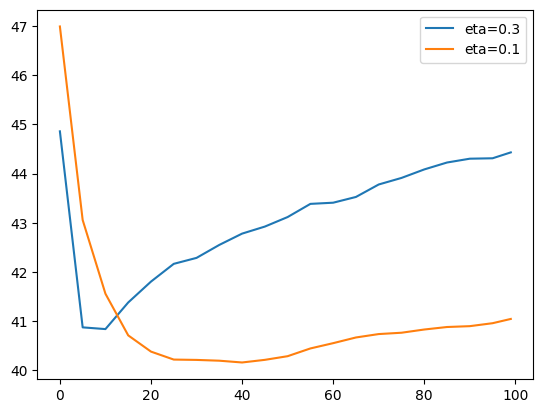

In [182]:
etas = ['eta=0.3', 'eta=0.1']

for eta in etas:
  df_score = scores[eta]
  plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.legend()